# Implementing a Perceptron

In [41]:
# !pip install numpy pandas matplotlib

## Loading the Dataset

In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [43]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [44]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [45]:
X_train.shape

(20, 2)

In [46]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [48]:
y_train.shape

(20,)

In [49]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## Visualizing the dataset

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

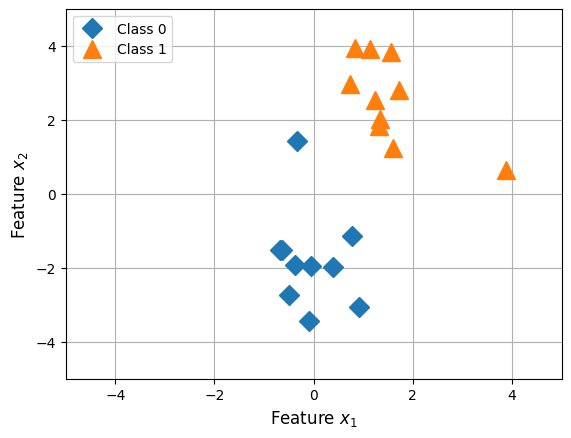

In [51]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

# Implementing the Perceptron

In [52]:
class Perceptron:
    def __init__(self, num_features: int):
        """Initialize the perceptron
        
        Args:
            num_features: The number of features in the input
        """
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x: list[float]) -> int:
        """Calculate the weighted sum, z = x1w1 + x2w2 + b and return the prediction
        
        Args:
            x: List of features
        """
        weighted_sum_z = self.bias
        for i in range(self.num_features):
            weighted_sum_z += x[i] * self.weights[i]

        # Activation function (threshold = 0)
        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction
    

    def update(self, x: list[float], true_y: int) -> int:
        """Update the weights and bias
        
        Args:
            x: List of features
            true_y: True label
        """

        prediction = self.forward(x)
        error = true_y - prediction

        # Update the weights and bias
        self.bias += error
        for i in range(self.num_features):
            self.weights[i] += error * x[i]

        return error

In [53]:
ppn = Perceptron(num_features=2)

In [54]:
print(f"Weights: {ppn.weights}")
print(f"Bias: {ppn.bias}")

Weights: [0.0, 0.0]
Bias: 0.0


In [55]:
x = [1.1, 2.1]
ppn.update(x, true_y=1)

1

In [56]:
print(f"Weights: {ppn.weights}")
print(f"Bias: {ppn.bias}")

Weights: [1.1, 2.1]
Bias: 1.0


In [57]:
def train(model: Perceptron, all_x: np.array, all_y: np.array, epochs: int):
    """Train the perceptron model
    
    Args:
        model: Perceptron model
        all_x: All input features
        all_y: All true labels
        epochs: Number of epochs
    """
    # For each epoch
    for epoch in range(epochs):
        # Count the errors just for monitoring
        error_count = 0

        # Loop over all data in each epoch
        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)
        
        print(f"Epoch: {epoch}, Error: {error_count}")

In [58]:
p = Perceptron(num_features=2)

train(model=p, all_x=X_train, all_y=y_train, epochs=5)

Epoch: 0, Error: 1
Epoch: 1, Error: 3
Epoch: 2, Error: 1
Epoch: 3, Error: 0
Epoch: 4, Error: 0


# Evaluate performance

In [59]:
def calculate_accuracy(model, all_x, all_y):
    correct_count = 0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        if prediction == y:
            correct_count += 1
    
    return correct_count / len(all_y)

Ideally, we would compute this on a test dataset but for now we only have the X_train/y_train

In [60]:
train_accuracy = calculate_accuracy(model=p, all_x=X_train, all_y=y_train)
print(f"Accuracy: {train_accuracy*100.0:.2f}%")

Accuracy: 100.00%


In [61]:
def find_decision_boundary(model: Perceptron) -> tuple:
    """Find the decision boundary of the model
    
    Args:
        model: Perceptron model
    """
    w1, w2 = model.weights
    b = model.bias

    # Pick two points way off the grid so that the decision boundary covers the whole space
    x1_min = -20
    x1_max = 20

    # Calculate the corresponding x2 values from the z formula
    x2_min = -(w1 * x1_min + b) / w2
    x2_max = -(w1 * x1_max + b) / w2

    return x1_min, x2_min, x1_max, x2_max


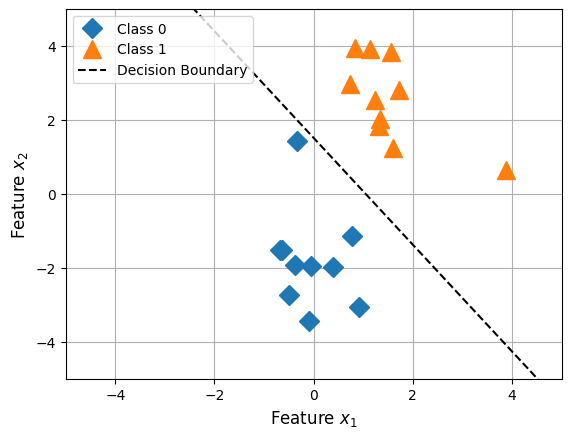

In [62]:
x1_min, x2_min, x1_max, x2_max = find_decision_boundary(model=p)
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black", linestyle="--", label="Decision Boundary")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()